In [ ]:
#importing all the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.preprocessing import (StandardScaler,MinMaxScaler)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#uploading dfs
df = pd.read_csv('/content/sample_data/thyroidDF.csv')
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,0,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,0,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,0,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,0,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,1,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,0,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,0,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,1,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,0,870119027


In [ ]:
df.shape #total no of rows and columns in df

(9172, 31)

In [ ]:
df.info()   #information of the df
df.describe().T  #description of the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

,count,mean,std,min,25%,50%,75%,max
age,9172.0,7.355582e+01,1.183977e+03,1.000000e+00,3.700000e+01,5.500000e+01,6.800000e+01,6.552600e+04
TSH,8330.0,5.218403e+00,2.418401e+01,5.000000e-03,4.600000e-01,1.400000e+00,2.700000e+00,5.300000e+02
T3,6568.0,1.970629e+00,8.875788e-01,5.000000e-02,1.500000e+00,1.900000e+00,2.300000e+00,1.800000e+01
TT4,8730.0,1.087003e+02,3.752267e+01,2.000000e+00,8.700000e+01,1.040000e+02,1.260000e+02,6.000000e+02
T4U,8363.0,9.760557e-01,2.003604e-01,1.700000e-01,8.600000e-01,9.600000e-01,1.065000e+00,2.330000e+00
FTI,8370.0,1.136407e+02,4.155165e+01,1.400000e+00,9.300000e+01,1.090000e+02,1.280000e+02,8.810000e+02
TBG,349.0,2.987006e+01,2.108050e+01,1.000000e-01,2.100000e+01,2.600000e+01,3.100000e+01,2.000000e+02
target,9172.0,2.617750e-01,4.396247e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
patient_id,9172.0,8.529473e+08,7.581969e+06,8.408010e+08,8.504090e+08,8.510040e+08,8.607110e+08,8.701190e+08


In [ ]:
df.isnull().sum() #counting all the null values presents in the df

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
#dropping the redundant columns

df.drop(['query_on_thyroxine', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'TBG', 'patient_id', 'referral_source'], axis=1, inplace=True)

In [ ]:
#assigning null values to outlier values of column 'age'

df['age'] = np.where((df.age > 100), np.nan, df.age)

In [ ]:
#filling all the null values present in the df 

df = df.fillna(df.mean())
df = df.fillna(df.mode().iloc[0])
df

<ipython-input-8-84f95ff6c35b>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29.0,F,f,f,f,f,f,f,t,f,...,f,f,f,f,0.300000,1.970629,108.700305,0.976056,113.640746,0
1,29.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.600000,1.900000,128.000000,0.976056,113.640746,0
2,41.0,F,f,f,f,f,f,f,f,t,...,f,f,f,f,5.218403,1.970629,108.700305,0.976056,113.640746,0
3,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,5.218403,1.970629,108.700305,0.976056,113.640746,0
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,5.218403,1.970629,108.700305,0.976056,113.640746,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56.0,M,f,f,f,f,f,f,f,t,...,f,f,f,f,5.218403,1.970629,64.000000,0.830000,77.000000,0
9168,22.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,5.218403,1.970629,91.000000,0.920000,99.000000,0
9169,69.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,5.218403,1.970629,113.000000,1.270000,89.000000,1
9170,47.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,5.218403,1.970629,75.000000,0.850000,88.000000,0


In [ ]:
df.isnull().sum() #checking  all the null values again

age                    0
sex                    0
on_thyroxine           0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
target                 0
dtype: int64

In [ ]:
df.shape

(9172, 21)

In [ ]:
#checking categorical feature
print(df.select_dtypes(include=['object']).columns.tolist())

#checking numerical features 
print(df.select_dtypes(exclude=['object']).columns.tolist())

['sex', 'on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']
['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']


In [ ]:
categorical_cols = ['sex', 'on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych']
numerical_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']

In [ ]:
label_encoder = preprocessing.LabelEncoder()

for i in range(0,len(categorical_cols)):
 df[categorical_cols[i]] = label_encoder.fit_transform(df[categorical_cols[i]])
 df[categorical_cols[i]].unique()

In [ ]:
#Label Encoding

le = LabelEncoder()

df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)
df

,age,sex,on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0.300000,1.970629,108.700305,0.976056,113.640746,0
1,29.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.600000,1.900000,128.000000,0.976056,113.640746,0
2,41.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746,0
3,36.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746,0
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.218403,1.970629,108.700305,0.976056,113.640746,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56.0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,5.218403,1.970629,64.000000,0.830000,77.000000,0
9168,22.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,5.218403,1.970629,91.000000,0.920000,99.000000,0
9169,69.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,5.218403,1.970629,113.000000,1.270000,89.000000,1
9170,47.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.218403,1.970629,75.000000,0.850000,88.000000,0


In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(25,20))
axs = np.ravel(axs)

for i, col in enumerate(categorical_cols):
    plt.sca(axs[i])
    g = sns.countplot(data=df, x=col, palette="Set1")
    for rect in g.patches:
        x, y = rect.get_x(), rect.get_y()
        h, w = rect.get_height(), rect.get_width()
        plt.annotate(f"{h}", (x+w/2, h), ha='center', va='bottom', fontsize=10, color='k')

    plt.xticks(rotation=15)

plt.show()

NameError: ignored

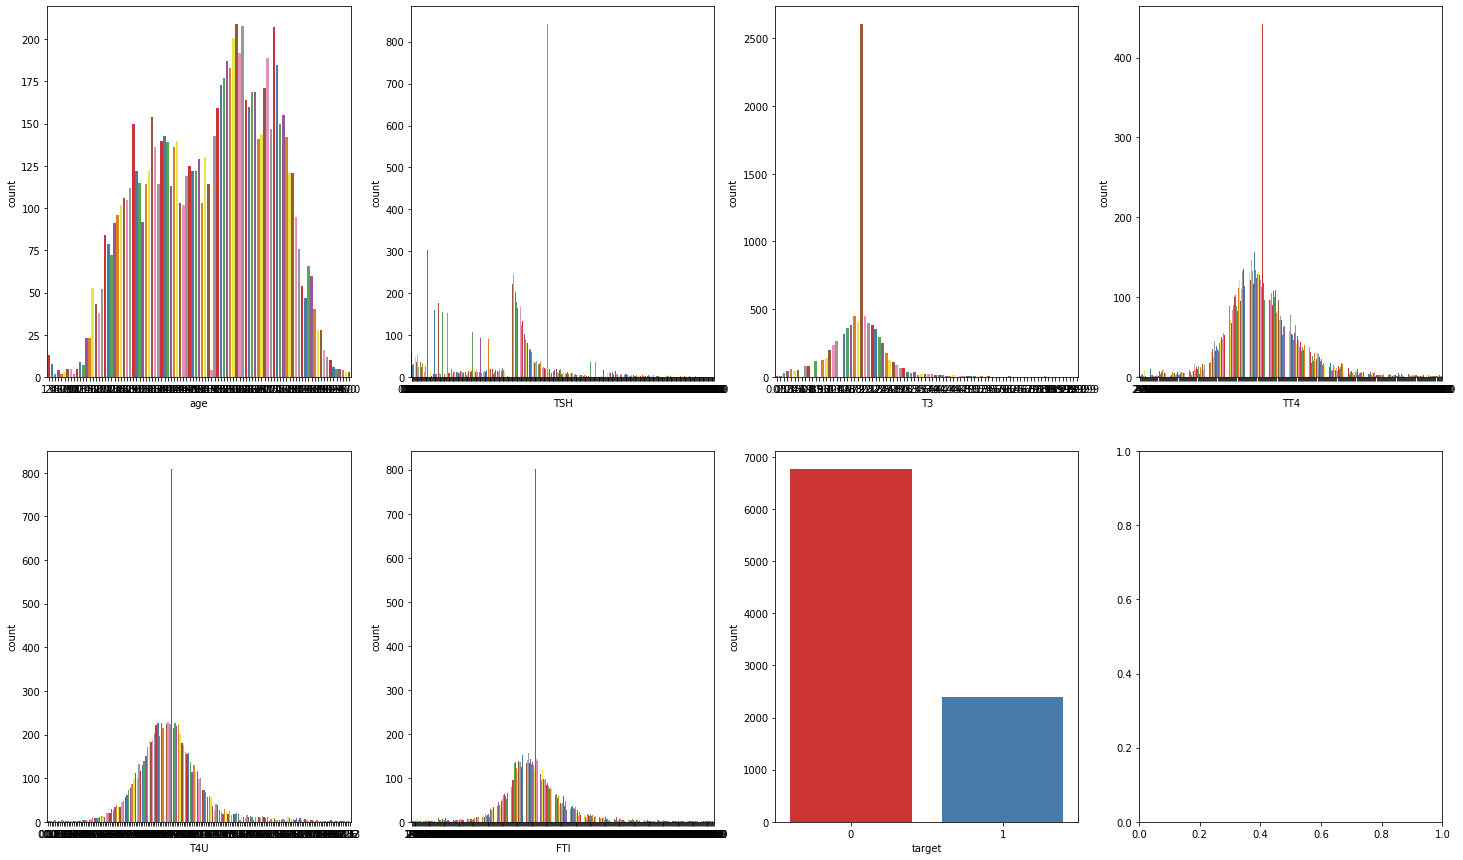

In [ ]:
#plotting bar chart for numerical columns

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(25,15))
axs = np.ravel(axs)

for i, col in enumerate(numerical_cols):
    plt.sca(axs[i])
    sns.countplot(data=df, x=col, palette='Set1')
plt.show()

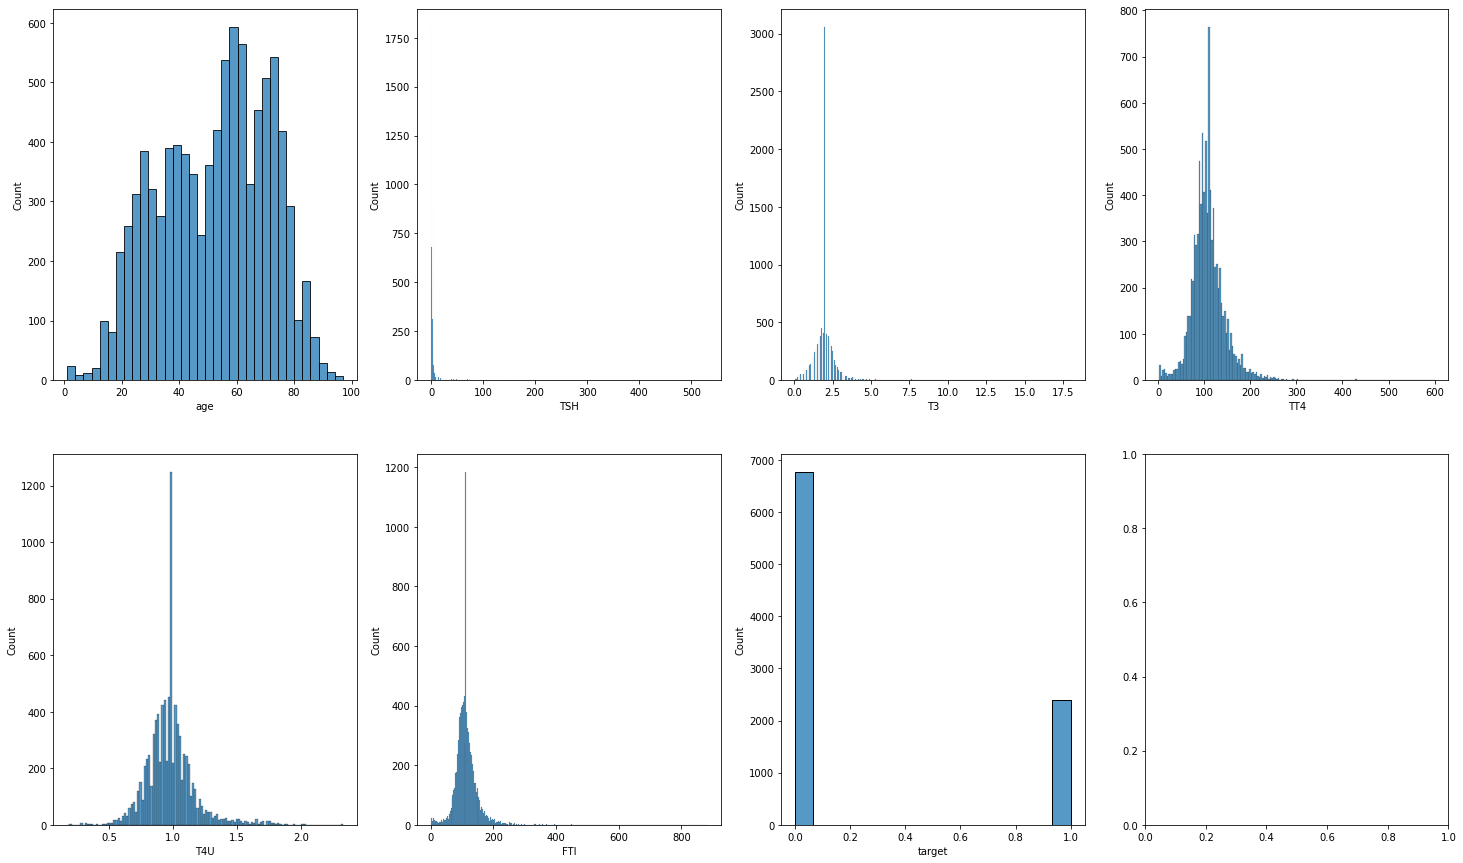

In [ ]:
#plotting bar chart for numerical columns

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(25,15))
axs = np.ravel(axs)

for i, col in enumerate(numerical_cols):
    plt.sca(axs[i])
    sns.histplot(data=df, x=col, palette='Set1')
plt.show()

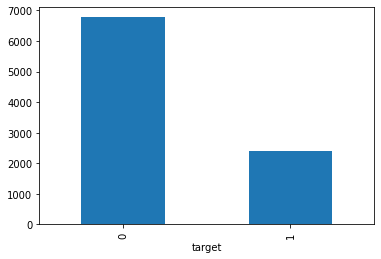

In [ ]:
df.pivot_table(index='target', aggfunc='size').plot(kind='bar')   #plotting bar chart for label

In [ ]:
#specifying X and y

X = df.drop(['target'],axis=1)
y = df.target
X.shape, y.shape

((9172, 20), (9172,))

In [ ]:
y.value_counts()

0    6771
1    2401
Name: target, dtype: int64

In [ ]:
#standardisation of the dataset

std = MinMaxScaler()
X = std.fit_transform(X)
df1 = pd.DataFrame(X)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.291667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000557,0.106999,0.178429,0.373174,0.127604
1,0.291667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003009,0.103064,0.210702,0.373174,0.127604
2,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.009837,0.106999,0.178429,0.373174,0.127604
3,0.364583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009837,0.106999,0.178429,0.373174,0.127604
4,0.322917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009837,0.106999,0.178429,0.373174,0.127604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,0.572917,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.009837,0.106999,0.103679,0.305556,0.085948
9168,0.218750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009837,0.106999,0.148829,0.347222,0.110960
9169,0.708333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009837,0.106999,0.185619,0.509259,0.099591
9170,0.479167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009837,0.106999,0.122074,0.314815,0.098454


In [ ]:
#finding the correlations

cor = df1.corr()
cor

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,-0.002145,0.004392,-0.048851,0.072779,-0.120397,-0.026549,0.052452,0.041093,-0.041859,-0.033000,-0.062016,-0.048134,-0.020779,-0.078274,-0.023562,-0.200477,-0.061184,-0.153280,0.019267
1,-0.002145,1.000000,-0.100796,-0.023983,0.009085,-0.071871,-0.039080,-0.009592,-0.070986,-0.064743,0.030013,-0.003905,-0.074600,0.006277,0.099700,-0.036707,-0.048889,-0.150475,-0.214717,-0.030148
2,0.004392,-0.100796,1.000000,-0.010508,-0.047841,0.010495,0.018294,0.071490,0.111985,-0.031057,-0.005007,0.002155,-0.009133,0.015756,-0.064994,0.009909,-0.000978,0.209422,0.049813,0.154466
3,-0.048851,-0.023983,-0.010508,1.000000,-0.022341,0.024049,-0.005649,0.006258,-0.026879,0.101701,-0.011455,-0.010881,-0.018592,-0.001671,-0.024731,-0.008572,0.086607,0.004485,0.042759,-0.021172
4,0.072779,0.009085,-0.047841,-0.022341,1.000000,-0.021446,-0.009688,-0.027046,0.005381,-0.027746,-0.008523,-0.018978,-0.003727,-0.002915,-0.032129,-0.019777,-0.062216,-0.033375,-0.021176,-0.025129
5,-0.120397,-0.071871,0.010495,0.024049,-0.021446,1.000000,-0.004766,-0.014885,-0.021476,0.064870,-0.010996,0.032191,0.102763,-0.001604,-0.014004,-0.015847,0.137196,0.130208,0.281776,-0.019433
6,-0.026549,-0.039080,0.018294,-0.005649,-0.009688,-0.004766,1.000000,0.003588,-0.000733,0.019424,-0.012324,-0.011706,0.002722,-0.001798,-0.026607,0.014908,-0.008748,-0.010879,0.024903,-0.021282
7,0.052452,-0.009592,0.071490,0.006258,-0.027046,-0.014885,0.003588,1.000000,0.052542,0.044215,-0.013867,-0.013172,-0.022507,-0.002023,-0.029939,0.003898,0.019831,-0.006417,0.015159,-0.013172
8,0.041093,-0.070986,0.111985,-0.026879,0.005381,-0.021476,-0.000733,0.052542,1.000000,0.015586,-0.010275,-0.017059,-0.025747,-0.004011,-0.036608,0.054552,-0.050447,-0.017900,0.017617,-0.032944
9,-0.041859,-0.064743,-0.031057,0.101701,-0.027746,0.064870,0.019424,0.044215,0.015586,1.000000,-0.019499,-0.026574,0.028919,-0.004082,-0.054292,-0.018245,0.153463,0.097277,0.051374,0.068687


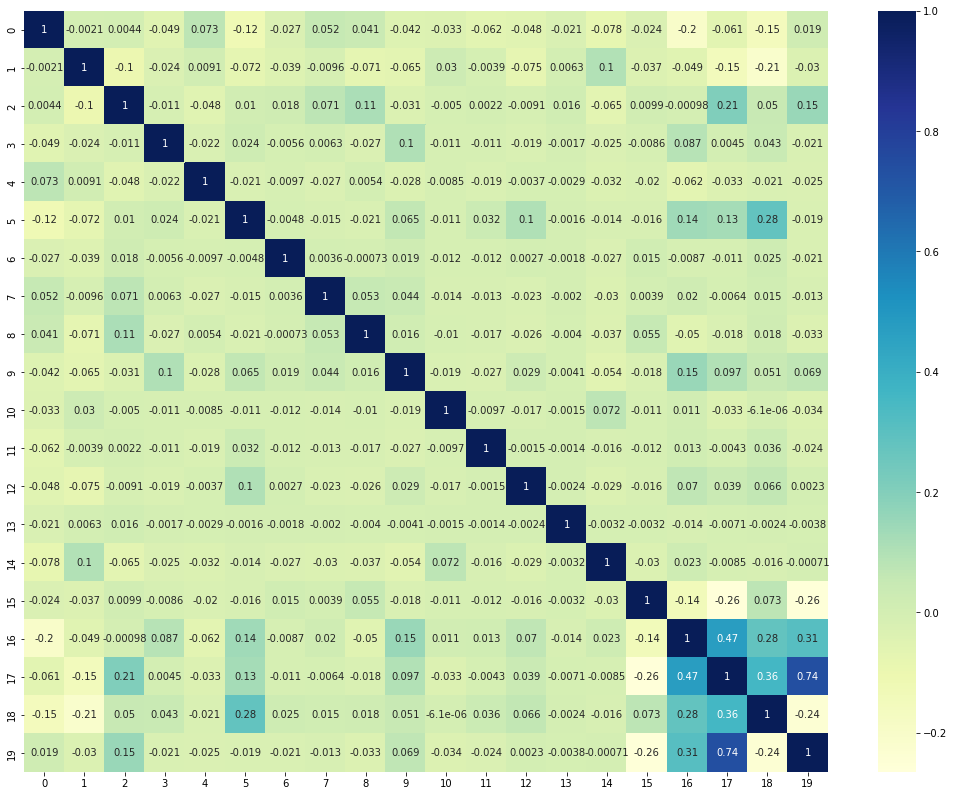

In [ ]:
#generation of heat map for the given data

plt.figure(figsize=(18,14))
sns.heatmap(cor,annot=True,cmap="YlGnBu")

In [ ]:
#splitting the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(8254, 20)
(8254,)
(918, 20)


In [ ]:
#importing all the model classifiers

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,HistGradientBoostingClassifier)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.neural_network import MLPClassifier
!pip install catboost
from catboost import CatBoostClassifier

from sklearn.metrics import (accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score, cohen_kappa_score)
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV

/usr/local/lib/python3.8/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 37 kB/s 


In [ ]:
#declaring all the models to be used

models = []

models.append(['Logistic Regression', LogisticRegression(random_state=0)])
models.append(['SVM Classifier', SVC(random_state=0, probability=True)])
models.append(['K-Neigbors Classifier', KNeighborsClassifier()])
models.append(['Gaussian NB', GaussianNB()])
models.append(['Bernoulli NB', BernoulliNB()])
models.append(['Linear Discriminant Analysis', LinearDiscriminantAnalysis()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Extra Trees', ExtraTreesClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGB Classifier', XGBClassifier(random_state=0)])
models.append(['AdaBoost Classifier', AdaBoostClassifier(random_state=0)])
models.append(['GradientBoosting Classifier', GradientBoostingClassifier(random_state=0)])
models.append(['HistGradientBoosting Classifier', HistGradientBoostingClassifier(random_state=0)])
models.append(['LGBM Classifier', LGBMClassifier(random_state=0)])
models.append(['MLP Classifier', MLPClassifier(random_state=0)])
models.append(['CatBoost Classifier', CatBoostClassifier()])

In [ ]:
def print_roc_curve(curve_list):

  # Plot ROC curve
  print()
  plt.figure(figsize=(10,7))
  plt.plot([0, 1], [0, 1], 'k--')

  for name, fpr, tpr, roc_auc in curve_list:
    plt.plot(fpr, tpr, label='{} (area = %0.3f)'.format(name) % roc_auc)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curves from the investigated models')
  plt.legend(loc='best')
  plt.show()

def run_model(X_train, y_train, X_test, y_test, model_lst, kcv):
  lst_1 = []
  roc_auc_list = []

  for m in range(len(model_lst)):
      lst_2 = []
      name = model_lst[m][0]
      model = model_lst[m][1]
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      cm = confusion_matrix(y_test, y_pred)
      
      # for ROC-AUC Curve
      y_pred_prob = model.predict_proba(X_test)[:,-1]
      fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
      roc_auc = auc(fpr, tpr)
      roc_auc_list.append([name, fpr, tpr, roc_auc])

      # for Confusion Matrix
      plt.figure(figsize=(7,5))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
      plt.title(name)
      plt.xlabel('Predict')
      plt.ylabel('Truth')
      plt.show()

      # k-fold Validation
      accuracies = cross_val_score(estimator= model, X = X_train, y = y_train, cv=kcv)
      acc_score = accuracy_score(y_test,y_pred)
      roc = roc_auc_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      cohen_score = cohen_kappa_score(y_test, y_pred)

      print(name,':')
      print(cm)
      print('Accuracy Score: ', acc_score)
      print('')
      print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
      print('')
      print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
      print('')
      print('ROC AUC Score: {:.2f} %'.format(roc))
      print('')
      print('Precision: {:.2f} %'.format(precision))
      print('')
      print('Recall: {:.2f} %'.format(recall))
      print('')
      print('F1 Score: {:.2f} %'.format(f1))
      print('')
      print('Cohen Score: {:.2f} %'.format(cohen_score))
      print('-'*40)
      print('')

      lst_2.append(name)
      lst_2.append(acc_score*100)
      lst_2.append(accuracies.mean()*100)
      lst_2.append(accuracies.std()*100)
      lst_2.append(roc)
      lst_2.append(precision)
      lst_2.append(recall)
      lst_2.append(f1)
      lst_2.append(cohen_score)
      lst_1.append(lst_2)

  print_roc_curve(roc_auc_list)

  df1 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score', 'Cohen-Kappa Score'])
  df1.sort_values(by=['Accuracy', 'K-Fold Mean Accuracy'],inplace=True,ascending=False)

  return df1

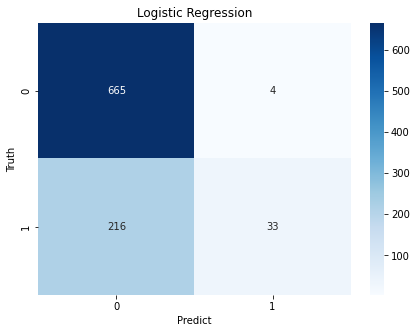

Logistic Regression :
[[665   4]
 [216  33]]
Accuracy Score:  0.7603485838779956

K-Fold Validation Mean Accuracy: 76.62 %

Standard Deviation: 0.63 %

ROC AUC Score: 0.56 %

Precision: 0.89 %

Recall: 0.13 %

F1 Score: 0.23 %

Cohen Score: 0.17 %
----------------------------------------



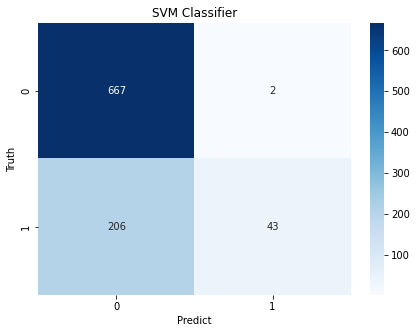

SVM Classifier :
[[667   2]
 [206  43]]
Accuracy Score:  0.7734204793028322

K-Fold Validation Mean Accuracy: 77.67 %

Standard Deviation: 0.49 %

ROC AUC Score: 0.58 %

Precision: 0.96 %

Recall: 0.17 %

F1 Score: 0.29 %

Cohen Score: 0.23 %
----------------------------------------



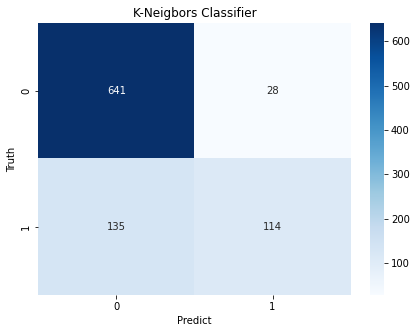

K-Neigbors Classifier :
[[641  28]
 [135 114]]
Accuracy Score:  0.8224400871459695

K-Fold Validation Mean Accuracy: 82.45 %

Standard Deviation: 0.73 %

ROC AUC Score: 0.71 %

Precision: 0.80 %

Recall: 0.46 %

F1 Score: 0.58 %

Cohen Score: 0.48 %
----------------------------------------



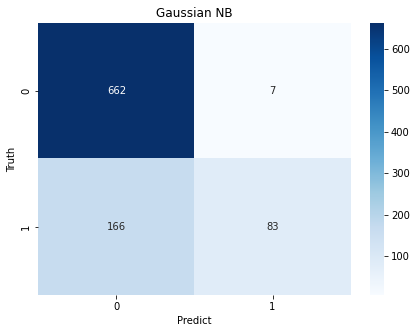

Gaussian NB :
[[662   7]
 [166  83]]
Accuracy Score:  0.8115468409586056

K-Fold Validation Mean Accuracy: 81.05 %

Standard Deviation: 1.23 %

ROC AUC Score: 0.66 %

Precision: 0.92 %

Recall: 0.33 %

F1 Score: 0.49 %

Cohen Score: 0.40 %
----------------------------------------



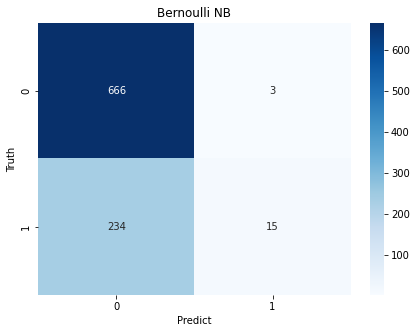

Bernoulli NB :
[[666   3]
 [234  15]]
Accuracy Score:  0.7418300653594772

K-Fold Validation Mean Accuracy: 74.38 %

Standard Deviation: 0.37 %

ROC AUC Score: 0.53 %

Precision: 0.83 %

Recall: 0.06 %

F1 Score: 0.11 %

Cohen Score: 0.08 %
----------------------------------------



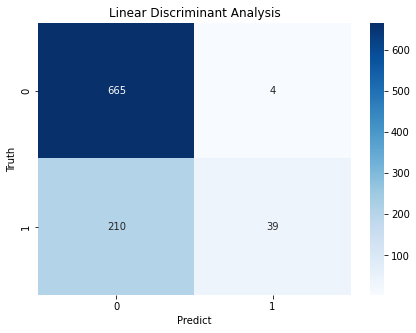

Linear Discriminant Analysis :
[[665   4]
 [210  39]]
Accuracy Score:  0.7668845315904139

K-Fold Validation Mean Accuracy: 77.30 %

Standard Deviation: 0.57 %

ROC AUC Score: 0.58 %

Precision: 0.91 %

Recall: 0.16 %

F1 Score: 0.27 %

Cohen Score: 0.20 %
----------------------------------------



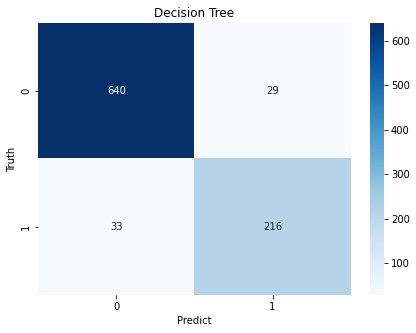

Decision Tree :
[[640  29]
 [ 33 216]]
Accuracy Score:  0.9324618736383442

K-Fold Validation Mean Accuracy: 93.35 %

Standard Deviation: 0.58 %

ROC AUC Score: 0.91 %

Precision: 0.88 %

Recall: 0.87 %

F1 Score: 0.87 %

Cohen Score: 0.83 %
----------------------------------------



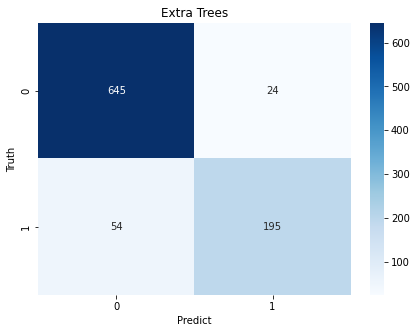

Extra Trees :
[[645  24]
 [ 54 195]]
Accuracy Score:  0.9150326797385621

K-Fold Validation Mean Accuracy: 91.18 %

Standard Deviation: 0.71 %

ROC AUC Score: 0.87 %

Precision: 0.89 %

Recall: 0.78 %

F1 Score: 0.83 %

Cohen Score: 0.78 %
----------------------------------------



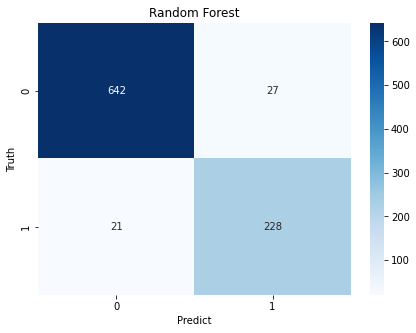

Random Forest :
[[642  27]
 [ 21 228]]
Accuracy Score:  0.9477124183006536

K-Fold Validation Mean Accuracy: 94.43 %

Standard Deviation: 0.87 %

ROC AUC Score: 0.94 %

Precision: 0.89 %

Recall: 0.92 %

F1 Score: 0.90 %

Cohen Score: 0.87 %
----------------------------------------



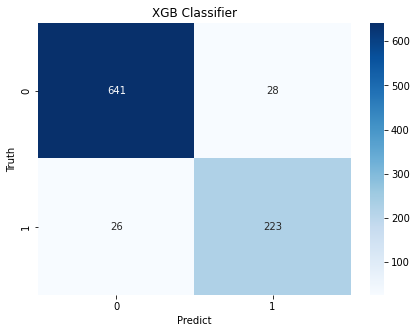

XGB Classifier :
[[641  28]
 [ 26 223]]
Accuracy Score:  0.9411764705882353

K-Fold Validation Mean Accuracy: 93.57 %

Standard Deviation: 1.00 %

ROC AUC Score: 0.93 %

Precision: 0.89 %

Recall: 0.90 %

F1 Score: 0.89 %

Cohen Score: 0.85 %
----------------------------------------



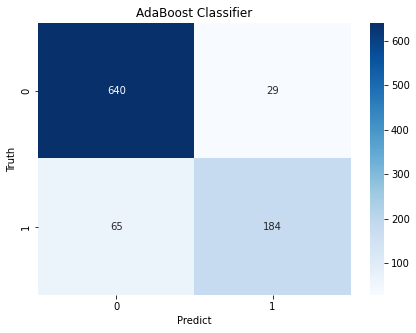

AdaBoost Classifier :
[[640  29]
 [ 65 184]]
Accuracy Score:  0.8976034858387799

K-Fold Validation Mean Accuracy: 89.19 %

Standard Deviation: 1.18 %

ROC AUC Score: 0.85 %

Precision: 0.86 %

Recall: 0.74 %

F1 Score: 0.80 %

Cohen Score: 0.73 %
----------------------------------------



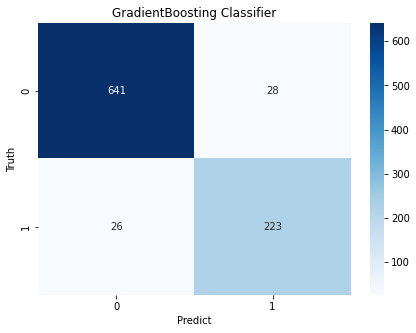

GradientBoosting Classifier :
[[641  28]
 [ 26 223]]
Accuracy Score:  0.9411764705882353

K-Fold Validation Mean Accuracy: 93.78 %

Standard Deviation: 0.78 %

ROC AUC Score: 0.93 %

Precision: 0.89 %

Recall: 0.90 %

F1 Score: 0.89 %

Cohen Score: 0.85 %
----------------------------------------



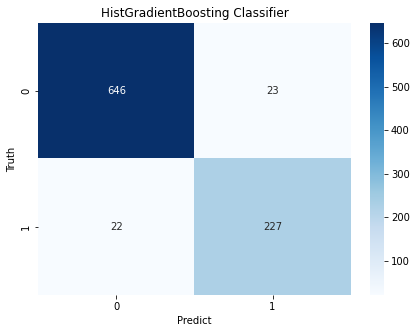

HistGradientBoosting Classifier :
[[646  23]
 [ 22 227]]
Accuracy Score:  0.9509803921568627

K-Fold Validation Mean Accuracy: 95.08 %

Standard Deviation: 0.61 %

ROC AUC Score: 0.94 %

Precision: 0.91 %

Recall: 0.91 %

F1 Score: 0.91 %

Cohen Score: 0.88 %
----------------------------------------



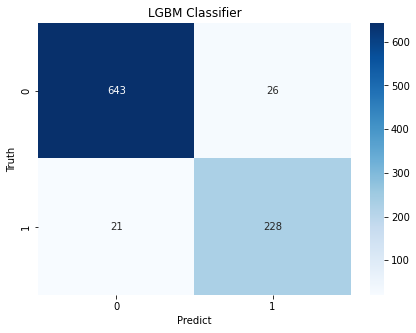

LGBM Classifier :
[[643  26]
 [ 21 228]]
Accuracy Score:  0.94880174291939

K-Fold Validation Mean Accuracy: 95.12 %

Standard Deviation: 0.53 %

ROC AUC Score: 0.94 %

Precision: 0.90 %

Recall: 0.92 %

F1 Score: 0.91 %

Cohen Score: 0.87 %
----------------------------------------



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


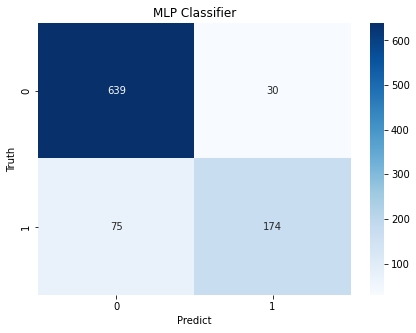

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

MLP Classifier :
[[639  30]
 [ 75 174]]
Accuracy Score:  0.8856209150326797

K-Fold Validation Mean Accuracy: 87.46 %

Standard Deviation: 1.38 %

ROC AUC Score: 0.83 %

Precision: 0.85 %

Recall: 0.70 %

F1 Score: 0.77 %

Cohen Score: 0.69 %
----------------------------------------

Learning rate set to 0.025372
0:	learn: 0.6635470	total: 4.82ms	remaining: 4.81s
1:	learn: 0.6369269	total: 8.8ms	remaining: 4.39s
2:	learn: 0.6085844	total: 12.7ms	remaining: 4.22s
3:	learn: 0.5815925	total: 16.6ms	remaining: 4.14s
4:	learn: 0.5600436	total: 20.6ms	remaining: 4.1s
5:	learn: 0.5389962	total: 24.6ms	remaining: 4.07s
6:	learn: 0.5196769	total: 28.5ms	remaining: 4.05s
7:	learn: 0.5021487	total: 32.5ms	remaining: 4.03s
8:	learn: 0.4860819	total: 36.4ms	remaining: 4.01s
9:	learn: 0.4690254	total: 44.7ms	remaining: 4.42s
10:	learn: 0.4554072	total: 49.6ms	remaining: 4.46s
11:	learn: 0.4426331	total: 55.1ms	remaining: 4.54s
12:	learn: 0.4273533	total: 63.8ms	remaining: 4.84s
13:	learn: 0.4151352	

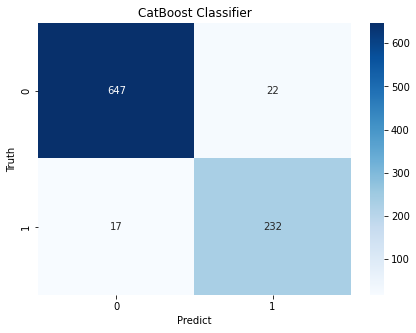

Streaming output truncated to the last 5000 lines.
25:	learn: 0.3123949	total: 116ms	remaining: 4.36s
26:	learn: 0.3053426	total: 120ms	remaining: 4.33s
27:	learn: 0.3004214	total: 124ms	remaining: 4.3s
28:	learn: 0.2949170	total: 128ms	remaining: 4.28s
29:	learn: 0.2916107	total: 132ms	remaining: 4.26s
30:	learn: 0.2870409	total: 138ms	remaining: 4.3s
31:	learn: 0.2833260	total: 141ms	remaining: 4.28s
32:	learn: 0.2791540	total: 145ms	remaining: 4.25s
33:	learn: 0.2740374	total: 149ms	remaining: 4.23s
34:	learn: 0.2693919	total: 153ms	remaining: 4.21s
35:	learn: 0.2658673	total: 157ms	remaining: 4.19s
36:	learn: 0.2624922	total: 161ms	remaining: 4.18s
37:	learn: 0.2590391	total: 164ms	remaining: 4.16s
38:	learn: 0.2565949	total: 168ms	remaining: 4.15s
39:	learn: 0.2540783	total: 172ms	remaining: 4.13s
40:	learn: 0.2516738	total: 177ms	remaining: 4.14s
41:	learn: 0.2482170	total: 180ms	remaining: 4.12s
42:	learn: 0.2456212	total: 184ms	remaining: 4.09s
43:	learn: 0.2421577	total: 188ms

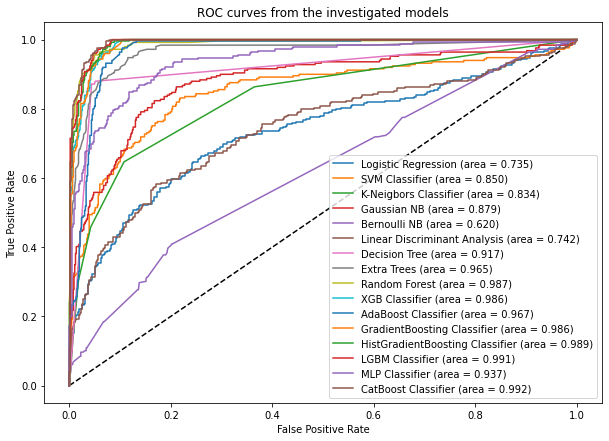

In [ ]:
#generating confusion matrices and results of performance metrices of the models used

test_imbalanced = run_model(X_train, y_train, X_test, y_test, models, 10)

In [ ]:
test_imbalanced

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score,Cohen-Kappa Score
15,CatBoost Classifier,95.751634,95.287035,0.570325,0.949421,0.913386,0.931727,0.922465,0.893212
12,HistGradientBoosting Classifier,95.098039,95.081062,0.612052,0.938633,0.908000,0.911647,0.909820,0.876162
13,LGBM Classifier,94.880174,95.117514,0.525458,0.938399,0.897638,0.915663,0.906561,0.871307
8,Random Forest,94.771242,94.426810,0.866157,0.937652,0.894118,0.915663,0.904762,0.868733
11,GradientBoosting Classifier,94.117647,93.784709,0.784393,0.926864,0.888446,0.895582,0.892000,0.851582
9,XGB Classifier,94.117647,93.566513,1.002900,0.926864,0.888446,0.895582,0.892000,0.851582
6,Decision Tree,93.246187,93.348639,0.580138,0.912061,0.881633,0.867470,0.874494,0.828298
7,Extra Trees,91.503268,91.179808,0.713012,0.873629,0.890411,0.783133,0.833333,0.776630
10,AdaBoost Classifier,89.760349,89.192897,1.177270,0.847804,0.863850,0.738956,0.796537,0.728677
14,MLP Classifier,88.562092,87.460812,1.384765,0.826976,0.852941,0.698795,0.768212,0.693281


In [ ]:
################ Hyper-parameter Tuning #################

In [ ]:
import numpy as np
CB_classifier = [(CatBoostClassifier(),
                 [{'depth' : list(range(4,11)), 'learning_rate' : np.linspace(0,0.1,5),  'n_estimators':[100, 200,250, 300, 400]}])]

In [ ]:
for i,j in CB_classifier:
  tun = RandomizedSearchCV(i,j,scoring='accuracy',cv=10,verbose=2,n_jobs=4)
  tun.fit(X_train,y_train)
  best_accuracy = tun.best_score_
  best_params = tun.best_params_
  print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
  print(' Best parameteres are: ', best_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/catboost/core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.8/dist-packages/catboost/core.py", line 2339, in _fit
    trai

0:	learn: 0.5807979	total: 16.8ms	remaining: 6.68s
1:	learn: 0.4960811	total: 33.1ms	remaining: 6.6s
2:	learn: 0.4216472	total: 48.7ms	remaining: 6.44s
3:	learn: 0.3672419	total: 63.1ms	remaining: 6.25s
4:	learn: 0.3233725	total: 80.2ms	remaining: 6.34s
5:	learn: 0.2926376	total: 95.5ms	remaining: 6.27s
6:	learn: 0.2660837	total: 112ms	remaining: 6.3s
7:	learn: 0.2473223	total: 127ms	remaining: 6.2s
8:	learn: 0.2315501	total: 148ms	remaining: 6.41s
9:	learn: 0.2158412	total: 162ms	remaining: 6.34s
10:	learn: 0.1993882	total: 178ms	remaining: 6.28s
11:	learn: 0.1837493	total: 193ms	remaining: 6.23s
12:	learn: 0.1779451	total: 208ms	remaining: 6.2s
13:	learn: 0.1718648	total: 227ms	remaining: 6.25s
14:	learn: 0.1676916	total: 242ms	remaining: 6.21s
15:	learn: 0.1637942	total: 256ms	remaining: 6.15s
16:	learn: 0.1589384	total: 270ms	remaining: 6.09s
17:	learn: 0.1565022	total: 284ms	remaining: 6.02s
18:	learn: 0.1534447	total: 298ms	remaining: 5.97s
19:	learn: 0.1510822	total: 313ms	remai

In [ ]:
HGB_classifier = [(HistGradientBoostingClassifier(),
                  [{'learning_rate' : [0.01,0.04,0.07,0.1],'max_iter' : list(range(75,150)),'max_leaf_nodes' : [10,20,30,31,35], 'max_iter':[100,200,250,300,350],'min_samples_leaf':[20,30,40]}])]

In [ ]:
for i,j in HGB_classifier:
  tun = RandomizedSearchCV(i,j,scoring='accuracy',cv=10,verbose=2,n_jobs=4)
  tun.fit(X_train,y_train)
  best_accuracy = tun.best_score_
  best_params = tun.best_params_
  print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
  print(' Best parameteres are: ', best_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
 HistGradientBoostingClassifier(): 
 Best Accuracy: 95.20 %
 Best parameteres are:  {'min_samples_leaf': 20, 'max_leaf_nodes': 35, 'max_iter': 250, 'learning_rate': 0.07}


In [ ]:
LGBM_classifier = [(LGBMClassifier(),
                   [{'learning_rate' : [0.01,0.04,0.07,0.1],'n_estimators' : list(range(10,100)),'min_data_in_leaf' : list(range(10,25))}])]

In [ ]:
for i,j in LGBM_classifier:
  tun = RandomizedSearchCV(i,j,scoring='accuracy',cv=10,verbose=2,n_jobs=4)
  tun.fit(X_train,y_train)
  best_accuracy = tun.best_score_
  best_params = tun.best_params_
  print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
  print(' Best parameteres are: ', best_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
 LGBMClassifier(): 
 Best Accuracy: 95.36 %
 Best parameteres are:  {'n_estimators': 95, 'min_data_in_leaf': 10, 'learning_rate': 0.07}


In [ ]:
XGB_classifier = [(XGBClassifier(),
                  [{'learning_rate' : [0.01,0.04,0.07,0.1],'max_iter' : list(range(75,150)),'max_leaf_nodes' : [10,20,30]}])]

In [ ]:
for i,j in XGB_classifier:
  tun = RandomizedSearchCV(i,j,scoring='accuracy',cv=10,verbose=2,n_jobs=4)
  tun.fit(X_train,y_train)
  best_accuracy = tun.best_score_
  best_params = tun.best_params_
  print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
  print(' Best parameteres are: ', best_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
 XGBClassifier(): 
 Best Accuracy: 93.57 %
 Best parameteres are:  {'max_leaf_nodes': 10, 'max_iter': 82, 'learning_rate': 0.1}


In [ ]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
GB_classifier = [(GradientBoostingClassifier(),
                  [{"learning_rate": sp_randFloat(),
                  "subsample"    : sp_randFloat(),
                  "n_estimators" : sp_randInt(100, 1000),
                  "max_depth"    : sp_randInt(4, 10)
                 }])]

In [ ]:
for i,j in GB_classifier:
  tun = RandomizedSearchCV(i,j,scoring='accuracy',cv=10,verbose=2,n_jobs=4)
  tun.fit(X_train,y_train)
  best_accuracy = tun.best_score_
  best_params = tun.best_params_
  print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
  print(' Best parameteres are: ', best_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
 GradientBoostingClassifier(): 
 Best Accuracy: 94.11 %
 Best parameteres are:  {'learning_rate': 0.16585042672855443, 'max_depth': 6, 'n_estimators': 808, 'subsample': 0.4481166559484874}


In [ ]:
AB_classifier = [(AdaBoostClassifier(),
                  [{'n_estimators':[10,50,250,1000],'learning_rate':[0.01,0.1]}])]

In [ ]:
for i,j in AB_classifier:
  tun = RandomizedSearchCV(i,j,scoring='accuracy',cv=10,verbose=2,n_jobs=4)
  tun.fit(X_train,y_train)
  best_accuracy = tun.best_score_
  best_params = tun.best_params_
  print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
  print(' Best parameteres are: ', best_params)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


 AdaBoostClassifier(): 
 Best Accuracy: 89.44 %
 Best parameteres are:  {'n_estimators': 1000, 'learning_rate': 0.1}


In [ ]:
#######################################################################################################################################################################

In [ ]:
################# Tuning Boosting Model ######################################

In [ ]:
models = []

#models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
#models.append(['Random Forest', RandomForestClassifier(random_state=0)])

models.append(['XGB Classifier', XGBClassifier(random_state=0,max_leaf_nodes=10,max_iter=82,learning_rate=0.1)])
models.append(['AdaBoost Classifier', AdaBoostClassifier(random_state=0, n_estimators=1000, learning_rate=0.1)])
models.append(['GradientBoosting Classifier', GradientBoostingClassifier(random_state=0,learning_rate=0.16585042672855443,max_depth=6, n_estimators=808,subsample=0.4481166559484874)])
models.append(['HistGradientBoosting Classifier', HistGradientBoostingClassifier(random_state=0,min_samples_leaf=20,max_leaf_nodes=35,max_iter=250,learning_rate=0.07)])
models.append(['LGBM Classifier', LGBMClassifier(random_state=0,n_estimators=95,min_data_in_leaf=10,learning_rate=0.07)])
models.append(['CatBoost Classifier', CatBoostClassifier(n_estimators=400, learning_rate=0.1, depth=9)])

In [ ]:
def print_roc_curve(curve_list):

  # Plot ROC curve
  print()
  plt.figure(figsize=(10,7))
  plt.plot([0, 1], [0, 1], 'k--')

  for name, fpr, tpr, roc_auc in curve_list:
    plt.plot(fpr, tpr, label='{} (area = %0.3f)'.format(name) % roc_auc)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curves from the investigated models')
  plt.legend(loc='best')
  plt.show()

def run_model(X_train, y_train, X_test, y_test, model_lst, kcv):
  lst_1 = []
  roc_auc_list = []

  for m in range(len(model_lst)):
      lst_2 = []
      name = model_lst[m][0]
      model = model_lst[m][1]
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      cm = confusion_matrix(y_test, y_pred)
      
      # for ROC-AUC Curve
      y_pred_prob = model.predict_proba(X_test)[:,-1]
      fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
      roc_auc = auc(fpr, tpr)
      roc_auc_list.append([name, fpr, tpr, roc_auc])

      # for Confusion Matrix
      plt.figure(figsize=(7,5))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
      plt.title(name)
      plt.xlabel('Predict')
      plt.ylabel('Truth')
      plt.show()

      # k-fold Validation
      accuracies = cross_val_score(estimator= model, X = X_train, y = y_train, cv=kcv)
      acc_score = accuracy_score(y_test,y_pred)
      roc = roc_auc_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      cohen_score = cohen_kappa_score(y_test, y_pred)

      print(name,':')
      print(cm)
      print('Accuracy Score: ', acc_score)
      print('')
      print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
      print('')
      print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
      print('')
      print('ROC AUC Score: {:.2f} %'.format(roc))
      print('')
      print('Precision: {:.2f} %'.format(precision))
      print('')
      print('Recall: {:.2f} %'.format(recall))
      print('')
      print('F1 Score: {:.2f} %'.format(f1))
      print('')
      print('Cohen Score: {:.2f} %'.format(cohen_score))
      print('-'*40)
      print('')

      lst_2.append(name)
      lst_2.append(acc_score*100)
      lst_2.append(accuracies.mean()*100)
      lst_2.append(accuracies.std()*100)
      lst_2.append(roc)
      lst_2.append(precision)
      lst_2.append(recall)
      lst_2.append(f1)
      lst_2.append(cohen_score)
      lst_1.append(lst_2)

  print_roc_curve(roc_auc_list)

  df1 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score', 'Cohen-Kappa Score'])
  df1.sort_values(by=['Accuracy', 'K-Fold Mean Accuracy'],inplace=True,ascending=False)

  return df1

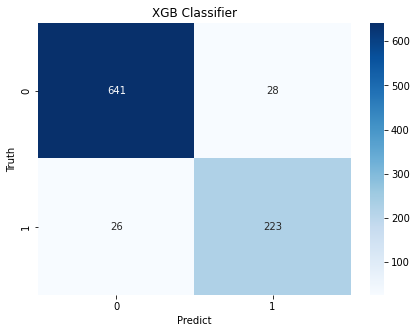

XGB Classifier :
[[641  28]
 [ 26 223]]
Accuracy Score:  0.9411764705882353

K-Fold Validation Mean Accuracy: 93.57 %

Standard Deviation: 1.00 %

ROC AUC Score: 0.93 %

Precision: 0.89 %

Recall: 0.90 %

F1 Score: 0.89 %

Cohen Score: 0.85 %
----------------------------------------



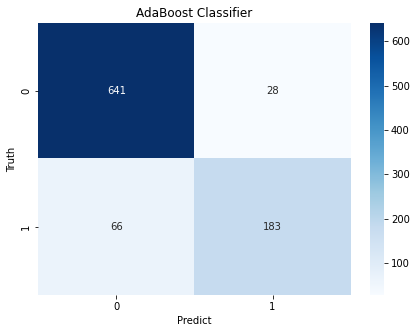

AdaBoost Classifier :
[[641  28]
 [ 66 183]]
Accuracy Score:  0.8976034858387799

K-Fold Validation Mean Accuracy: 89.44 %

Standard Deviation: 1.09 %

ROC AUC Score: 0.85 %

Precision: 0.87 %

Recall: 0.73 %

F1 Score: 0.80 %

Cohen Score: 0.73 %
----------------------------------------



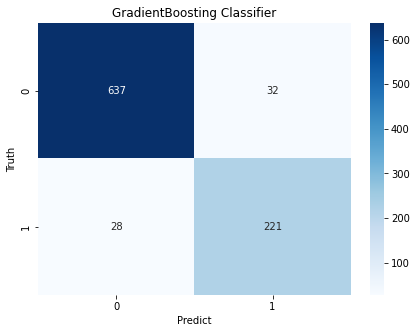

GradientBoosting Classifier :
[[637  32]
 [ 28 221]]
Accuracy Score:  0.934640522875817

K-Fold Validation Mean Accuracy: 94.09 %

Standard Deviation: 0.84 %

ROC AUC Score: 0.92 %

Precision: 0.87 %

Recall: 0.89 %

F1 Score: 0.88 %

Cohen Score: 0.84 %
----------------------------------------



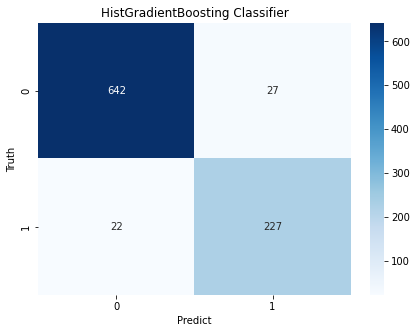

HistGradientBoosting Classifier :
[[642  27]
 [ 22 227]]
Accuracy Score:  0.9466230936819172

K-Fold Validation Mean Accuracy: 95.20 %

Standard Deviation: 0.60 %

ROC AUC Score: 0.94 %

Precision: 0.89 %

Recall: 0.91 %

F1 Score: 0.90 %

Cohen Score: 0.87 %
----------------------------------------



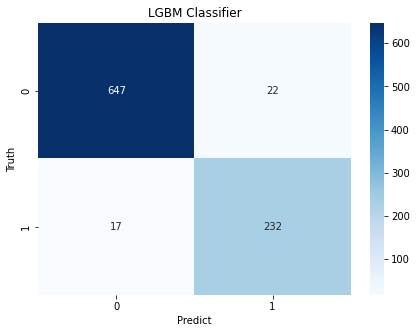

LGBM Classifier :
[[647  22]
 [ 17 232]]
Accuracy Score:  0.9575163398692811

K-Fold Validation Mean Accuracy: 95.36 %

Standard Deviation: 0.41 %

ROC AUC Score: 0.95 %

Precision: 0.91 %

Recall: 0.93 %

F1 Score: 0.92 %

Cohen Score: 0.89 %
----------------------------------------

0:	learn: 0.5807979	total: 18.5ms	remaining: 7.4s
1:	learn: 0.4960811	total: 33.5ms	remaining: 6.67s
2:	learn: 0.4216472	total: 47.7ms	remaining: 6.31s
3:	learn: 0.3672419	total: 62.3ms	remaining: 6.17s
4:	learn: 0.3233725	total: 77.1ms	remaining: 6.09s
5:	learn: 0.2926376	total: 91.8ms	remaining: 6.03s
6:	learn: 0.2660837	total: 107ms	remaining: 5.98s
7:	learn: 0.2473223	total: 124ms	remaining: 6.09s
8:	learn: 0.2315501	total: 146ms	remaining: 6.36s
9:	learn: 0.2158412	total: 161ms	remaining: 6.28s
10:	learn: 0.1993882	total: 178ms	remaining: 6.3s
11:	learn: 0.1837493	total: 196ms	remaining: 6.35s
12:	learn: 0.1779451	total: 213ms	remaining: 6.34s
13:	learn: 0.1718648	total: 228ms	remaining: 6.28s
14:	le

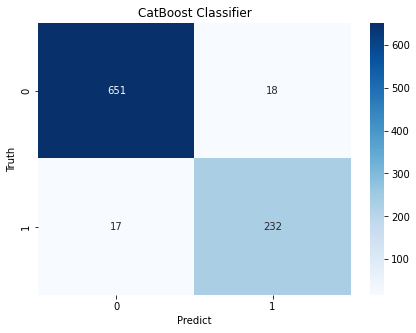

0:	learn: 0.5777291	total: 16.2ms	remaining: 6.48s
1:	learn: 0.4712531	total: 31.7ms	remaining: 6.32s
2:	learn: 0.4038717	total: 46.1ms	remaining: 6.09s
3:	learn: 0.3634309	total: 52.5ms	remaining: 5.2s
4:	learn: 0.3207036	total: 71.4ms	remaining: 5.64s
5:	learn: 0.2828378	total: 88.6ms	remaining: 5.82s
6:	learn: 0.2532651	total: 104ms	remaining: 5.86s
7:	learn: 0.2386505	total: 118ms	remaining: 5.8s
8:	learn: 0.2252621	total: 134ms	remaining: 5.84s
9:	learn: 0.2035499	total: 150ms	remaining: 5.86s
10:	learn: 0.1951058	total: 165ms	remaining: 5.83s
11:	learn: 0.1848502	total: 180ms	remaining: 5.83s
12:	learn: 0.1758223	total: 195ms	remaining: 5.8s
13:	learn: 0.1719862	total: 210ms	remaining: 5.79s
14:	learn: 0.1673663	total: 230ms	remaining: 5.9s
15:	learn: 0.1621698	total: 245ms	remaining: 5.87s
16:	learn: 0.1593557	total: 259ms	remaining: 5.84s
17:	learn: 0.1575286	total: 274ms	remaining: 5.82s
18:	learn: 0.1510563	total: 290ms	remaining: 5.81s
19:	learn: 0.1485056	total: 305ms	remai

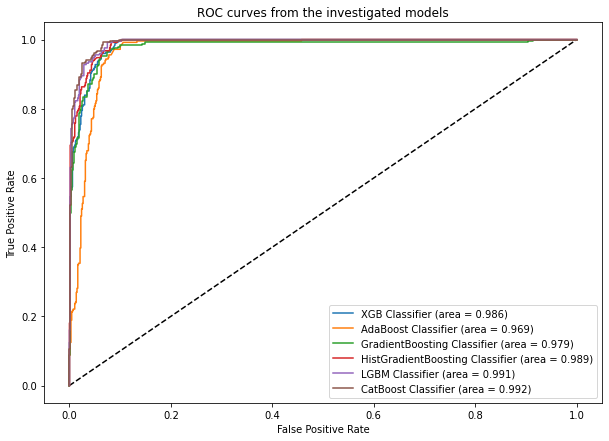

In [ ]:
test_imbalancedRS = run_model(X_train, y_train, X_test, y_test, models, 10)

In [ ]:
test_imbalancedRS

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score,Cohen-Kappa Score
5,CatBoost Classifier,96.187364,95.274958,0.576545,0.952411,0.928000,0.931727,0.929860,0.903682
4,LGBM Classifier,95.751634,95.359777,0.413412,0.949421,0.913386,0.931727,0.922465,0.893212
3,HistGradientBoosting Classifier,94.662309,95.202275,0.596865,0.935644,0.893701,0.911647,0.902584,0.865830
0,XGB Classifier,94.117647,93.566513,1.002900,0.926864,0.888446,0.895582,0.892000,0.851582
2,GradientBoosting Classifier,93.464052,94.087666,0.842936,0.919859,0.873518,0.887550,0.880478,0.835505
1,AdaBoost Classifier,89.760349,89.435395,1.091485,0.846543,0.867299,0.734940,0.795652,0.727959


In [ ]:
################# PREVIOUS ###############################################################################################################################################

In [ ]:
#tabular representation

test_imbalanced

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score,Cohen-Kappa Score
15,CatBoost Classifier,96.078431,95.214352,0.587469,0.952924,0.920949,0.935743,0.928287,0.901303
13,LGBM Classifier,94.880174,95.105437,0.466340,0.939660,0.894531,0.919679,0.906931,0.871628
12,HistGradientBoosting Classifier,94.880174,94.984166,0.680104,0.939660,0.894531,0.919679,0.906931,0.871628
8,Random Forest,94.880174,94.354142,0.795697,0.938399,0.897638,0.915663,0.906561,0.871307
9,XGB Classifier,94.117647,93.530178,1.005343,0.926864,0.888446,0.895582,0.892000,0.851582
11,GradientBoosting Classifier,93.899782,93.930090,0.772061,0.922848,0.887550,0.887550,0.887550,0.845697
6,Decision Tree,93.790850,93.324441,0.628316,0.919580,0.890244,0.879518,0.884848,0.842345
7,Extra Trees,91.394336,91.409935,0.957450,0.867839,0.900943,0.767068,0.828633,0.771672
10,AdaBoost Classifier,89.542484,89.253548,1.311271,0.845048,0.859155,0.734940,0.792208,0.722905
14,MLP Classifier,88.017429,87.569653,1.104508,0.816936,0.849246,0.678715,0.754464,0.676514


In [ ]:
#oversampling of data

sm = SMOTE()
X_res, y_res = sm.fit_resample(X,y)

In [ ]:
print(X_res.shape,y_res.shape)    #dimensions of dataset after balancing

(13542, 21) (13542,)


In [ ]:
print(y_res.value_counts())   #count of each result value from balanced dataset

0    6771
1    6771
Name: target, dtype: int64


In [ ]:
#splitting balanced dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state = 0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(10833, 21)
(10833,)
(2709, 21)


In [ ]:
#declaring all the balanced models to be used

models_balanced = []

models_balanced.append(['Logistic Regression', LogisticRegression(random_state=0)])
models_balanced.append(['SVM', SVC(random_state=0, probability=True)])
models_balanced.append(['K-Neigbors Classifier', KNeighborsClassifier()])
models_balanced.append(['Gaussian NB', GaussianNB()])
models_balanced.append(['Bernoulli NB', BernoulliNB()])
models_balanced.append(['Linear Discriminant Analysis', LinearDiscriminantAnalysis()])
models_balanced.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models_balanced.append(['ExtraTrees', ExtraTreesClassifier(random_state=0)])
models_balanced.append(['Random Forest', RandomForestClassifier(random_state=0)])
models_balanced.append(['XGB Classifier', XGBClassifier(random_state=0)])
models_balanced.append(['AdaBoost Classifier', AdaBoostClassifier(random_state=0)])
models_balanced.append(['GradientBoosting Classifier', GradientBoostingClassifier(random_state=0)])
models_balanced.append(['HistGradientBoosting Classifier', HistGradientBoostingClassifier(random_state=0)])
models_balanced.append(['LGBM Classifier', LGBMClassifier(random_state=0)])
models_balanced.append(['MLPClassifier', MLPClassifier(random_state=0)])
models_balanced.append(['CatBoost Classifier', CatBoostClassifier()])

In [ ]:
def print_roc_curve(curve_list):

  # Plot ROC curve
  print()
  plt.figure(figsize=(10,7))
  plt.plot([0, 1], [0, 1], 'k--')

  for name, fpr, tpr, roc_auc in curve_list:
    plt.plot(fpr, tpr, label='{} (area = %0.3f)'.format(name) % roc_auc)

  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC curves from the investigated models')
  plt.legend(loc='best')
  plt.show()

def run_model(X_train, y_train, X_test, y_test, model_lst, kcv):
  lst_1 = []
  roc_auc_list = []

  for m in range(len(model_lst)):
      lst_2 = []
      name = model_lst[m][0]
      model = model_lst[m][1]
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      cm = confusion_matrix(y_test, y_pred)
      
      # for ROC-AUC Curve
      y_pred_prob = model.predict_proba(X_test)[:,-1]
      fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
      roc_auc = auc(fpr, tpr)
      roc_auc_list.append([name, fpr, tpr, roc_auc])

      # for Confusion Matrix
      plt.figure(figsize=(7,5))
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
      plt.title(name)
      plt.xlabel('Predict')
      plt.ylabel('Truth')
      plt.show()

      # k-fold Validation
      accuracies = cross_val_score(estimator= model, X = X_train, y = y_train, cv=kcv)
      acc_score = accuracy_score(y_test,y_pred)
      roc = roc_auc_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred)
      recall = recall_score(y_test, y_pred)
      f1 = f1_score(y_test, y_pred)
      cohen_score = cohen_kappa_score(y_test, y_pred)

      print(name,':')
      print(cm)
      print('Accuracy Score: ', acc_score)
      print('')
      print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
      print('')
      print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
      print('')
      print('ROC AUC Score: {:.2f} %'.format(roc))
      print('')
      print('Precision: {:.2f} %'.format(precision))
      print('')
      print('Recall: {:.2f} %'.format(recall))
      print('')
      print('F1 Score: {:.2f} %'.format(f1))
      print('')
      print('Cohen Score: {:.2f} %'.format(cohen_score))
      print('-'*40)
      print('')

      lst_2.append(name)
      lst_2.append(acc_score*100)
      lst_2.append(accuracies.mean()*100)
      lst_2.append(accuracies.std()*100)
      lst_2.append(roc)
      lst_2.append(precision)
      lst_2.append(recall)
      lst_2.append(f1)
      lst_2.append(cohen_score)
      lst_1.append(lst_2)

  print_roc_curve(roc_auc_list)

  df1 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score', 'Cohen-Kappa Score'])
  df1.sort_values(by=['Accuracy', 'K-Fold Mean Accuracy'],inplace=True,ascending=False)

  return df1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


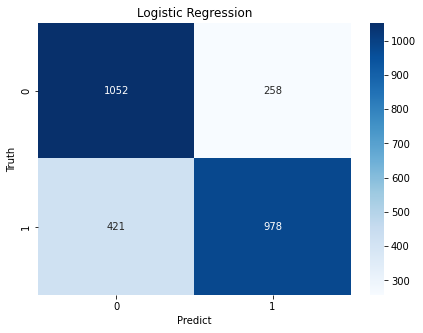

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression :
[[1052  258]
 [ 421  978]]
Accuracy Score:  0.7493540051679587

K-Fold Validation Mean Accuracy: 74.90 %

Standard Deviation: 0.89 %

ROC AUC Score: 0.75 %

Precision: 0.79 %

Recall: 0.70 %

F1 Score: 0.74 %

Cohen Score: 0.50 %
----------------------------------------



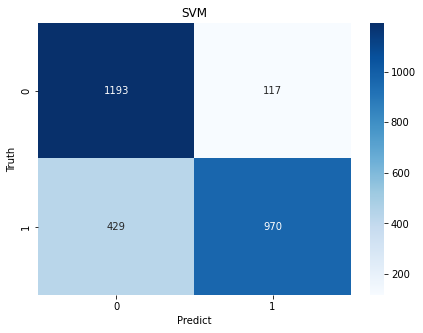

SVM :
[[1193  117]
 [ 429  970]]
Accuracy Score:  0.7984496124031008

K-Fold Validation Mean Accuracy: 78.54 %

Standard Deviation: 0.89 %

ROC AUC Score: 0.80 %

Precision: 0.89 %

Recall: 0.69 %

F1 Score: 0.78 %

Cohen Score: 0.60 %
----------------------------------------



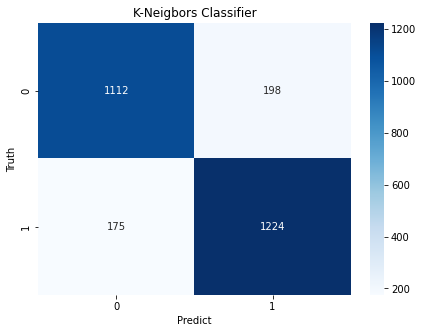

K-Neigbors Classifier :
[[1112  198]
 [ 175 1224]]
Accuracy Score:  0.8623108157991879

K-Fold Validation Mean Accuracy: 85.17 %

Standard Deviation: 1.22 %

ROC AUC Score: 0.86 %

Precision: 0.86 %

Recall: 0.87 %

F1 Score: 0.87 %

Cohen Score: 0.72 %
----------------------------------------



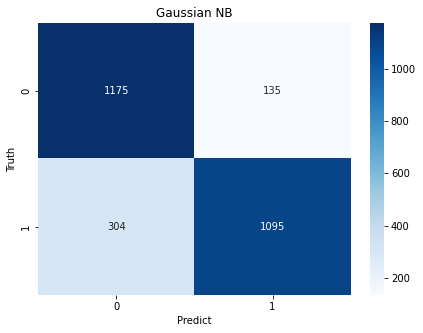

Gaussian NB :
[[1175  135]
 [ 304 1095]]
Accuracy Score:  0.8379475821336286

K-Fold Validation Mean Accuracy: 82.33 %

Standard Deviation: 4.35 %

ROC AUC Score: 0.84 %

Precision: 0.89 %

Recall: 0.78 %

F1 Score: 0.83 %

Cohen Score: 0.68 %
----------------------------------------



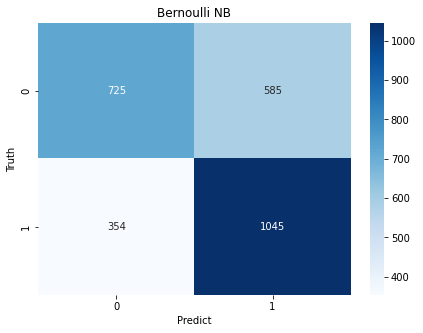

Bernoulli NB :
[[ 725  585]
 [ 354 1045]]
Accuracy Score:  0.6533776301218162

K-Fold Validation Mean Accuracy: 64.45 %

Standard Deviation: 1.13 %

ROC AUC Score: 0.65 %

Precision: 0.64 %

Recall: 0.75 %

F1 Score: 0.69 %

Cohen Score: 0.30 %
----------------------------------------



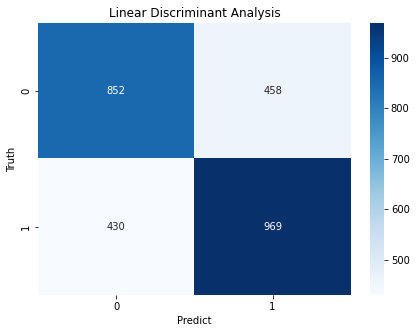

Linear Discriminant Analysis :
[[852 458]
 [430 969]]
Accuracy Score:  0.6722037652270211

K-Fold Validation Mean Accuracy: 66.79 %

Standard Deviation: 0.97 %

ROC AUC Score: 0.67 %

Precision: 0.68 %

Recall: 0.69 %

F1 Score: 0.69 %

Cohen Score: 0.34 %
----------------------------------------



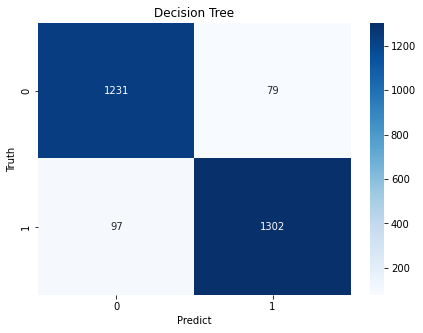

Decision Tree :
[[1231   79]
 [  97 1302]]
Accuracy Score:  0.935031376891842

K-Fold Validation Mean Accuracy: 92.81 %

Standard Deviation: 0.63 %

ROC AUC Score: 0.94 %

Precision: 0.94 %

Recall: 0.93 %

F1 Score: 0.94 %

Cohen Score: 0.87 %
----------------------------------------



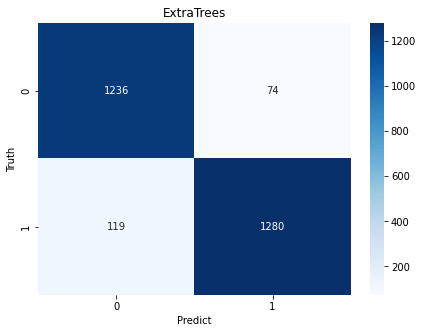

ExtraTrees :
[[1236   74]
 [ 119 1280]]
Accuracy Score:  0.9287559985234404

K-Fold Validation Mean Accuracy: 92.62 %

Standard Deviation: 0.65 %

ROC AUC Score: 0.93 %

Precision: 0.95 %

Recall: 0.91 %

F1 Score: 0.93 %

Cohen Score: 0.86 %
----------------------------------------



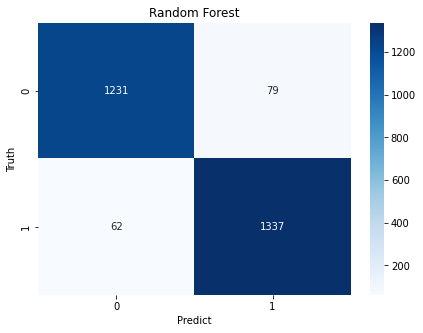

Random Forest :
[[1231   79]
 [  62 1337]]
Accuracy Score:  0.9479512735326688

K-Fold Validation Mean Accuracy: 94.07 %

Standard Deviation: 0.49 %

ROC AUC Score: 0.95 %

Precision: 0.94 %

Recall: 0.96 %

F1 Score: 0.95 %

Cohen Score: 0.90 %
----------------------------------------



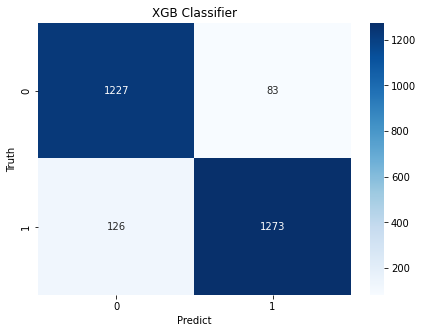

XGB Classifier :
[[1227   83]
 [ 126 1273]]
Accuracy Score:  0.9228497600590624

K-Fold Validation Mean Accuracy: 92.02 %

Standard Deviation: 0.54 %

ROC AUC Score: 0.92 %

Precision: 0.94 %

Recall: 0.91 %

F1 Score: 0.92 %

Cohen Score: 0.85 %
----------------------------------------



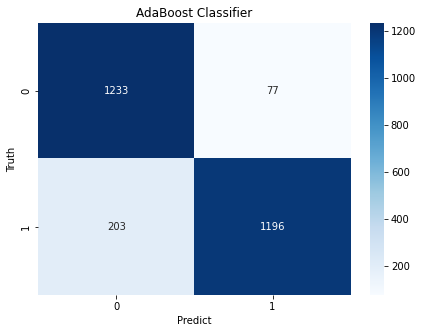

AdaBoost Classifier :
[[1233   77]
 [ 203 1196]]
Accuracy Score:  0.896640826873385

K-Fold Validation Mean Accuracy: 89.25 %

Standard Deviation: 0.77 %

ROC AUC Score: 0.90 %

Precision: 0.94 %

Recall: 0.85 %

F1 Score: 0.90 %

Cohen Score: 0.79 %
----------------------------------------



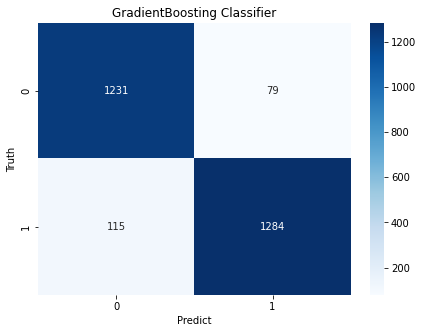

GradientBoosting Classifier :
[[1231   79]
 [ 115 1284]]
Accuracy Score:  0.9283868586194167

K-Fold Validation Mean Accuracy: 92.42 %

Standard Deviation: 0.56 %

ROC AUC Score: 0.93 %

Precision: 0.94 %

Recall: 0.92 %

F1 Score: 0.93 %

Cohen Score: 0.86 %
----------------------------------------



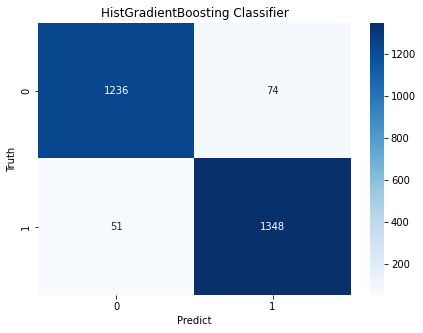

HistGradientBoosting Classifier :
[[1236   74]
 [  51 1348]]
Accuracy Score:  0.9538575119970469

K-Fold Validation Mean Accuracy: 94.68 %

Standard Deviation: 0.58 %

ROC AUC Score: 0.95 %

Precision: 0.95 %

Recall: 0.96 %

F1 Score: 0.96 %

Cohen Score: 0.91 %
----------------------------------------



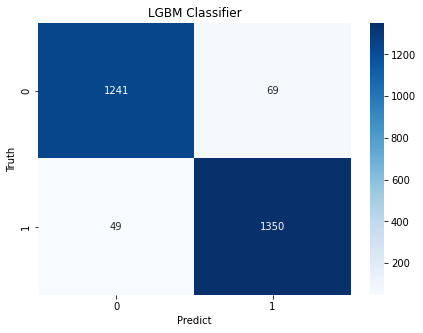

LGBM Classifier :
[[1241   69]
 [  49 1350]]
Accuracy Score:  0.9564414913252123

K-Fold Validation Mean Accuracy: 95.13 %

Standard Deviation: 0.52 %

ROC AUC Score: 0.96 %

Precision: 0.95 %

Recall: 0.96 %

F1 Score: 0.96 %

Cohen Score: 0.91 %
----------------------------------------



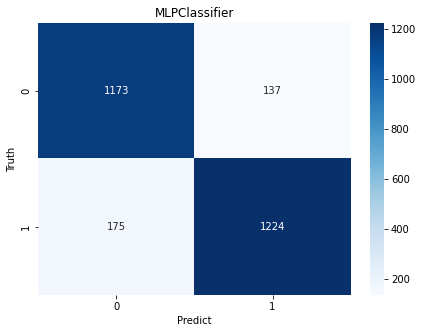

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier :
[[1173  137]
 [ 175 1224]]
Accuracy Score:  0.884828349944629

K-Fold Validation Mean Accuracy: 86.55 %

Standard Deviation: 1.81 %

ROC AUC Score: 0.89 %

Precision: 0.90 %

Recall: 0.87 %

F1 Score: 0.89 %

Cohen Score: 0.77 %
----------------------------------------

Learning rate set to 0.028495
0:	learn: 0.6642447	total: 18.7ms	remaining: 18.7s
1:	learn: 0.6380829	total: 33.3ms	remaining: 16.6s
2:	learn: 0.6148261	total: 52.7ms	remaining: 17.5s
3:	learn: 0.5907522	total: 60.2ms	remaining: 15s
4:	learn: 0.5679117	total: 66.5ms	remaining: 13.2s
5:	learn: 0.5480401	total: 72.2ms	remaining: 12s
6:	learn: 0.5291569	total: 78.2ms	remaining: 11.1s
7:	learn: 0.5127029	total: 83.9ms	remaining: 10.4s
8:	learn: 0.4961561	total: 90.1ms	remaining: 9.92s
9:	learn: 0.4814831	total: 97.8ms	remaining: 9.69s
10:	learn: 0.4678861	total: 105ms	remaining: 9.48s
11:	learn: 0.4550107	total: 111ms	remaining: 9.18s
12:	learn: 0.4425329	total: 118ms	remaining: 8.95s
13:	learn: 0.4296628	tot

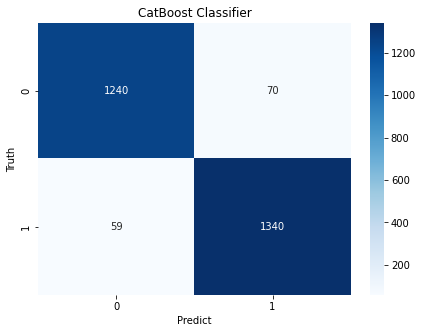

Streaming output truncated to the last 5000 lines.
25:	learn: 0.3404124	total: 157ms	remaining: 5.89s
26:	learn: 0.3340087	total: 162ms	remaining: 5.85s
27:	learn: 0.3285099	total: 168ms	remaining: 5.82s
28:	learn: 0.3232972	total: 173ms	remaining: 5.8s
29:	learn: 0.3194458	total: 179ms	remaining: 5.78s
30:	learn: 0.3159473	total: 184ms	remaining: 5.76s
31:	learn: 0.3127083	total: 190ms	remaining: 5.74s
32:	learn: 0.3089065	total: 197ms	remaining: 5.78s
33:	learn: 0.3053931	total: 203ms	remaining: 5.76s
34:	learn: 0.3019714	total: 208ms	remaining: 5.73s
35:	learn: 0.2991296	total: 213ms	remaining: 5.71s
36:	learn: 0.2959659	total: 218ms	remaining: 5.68s
37:	learn: 0.2920133	total: 223ms	remaining: 5.66s
38:	learn: 0.2889016	total: 229ms	remaining: 5.64s
39:	learn: 0.2859588	total: 234ms	remaining: 5.62s
40:	learn: 0.2831001	total: 239ms	remaining: 5.6s
41:	learn: 0.2803268	total: 244ms	remaining: 5.58s
42:	learn: 0.2775916	total: 250ms	remaining: 5.56s
43:	learn: 0.2754500	total: 255ms

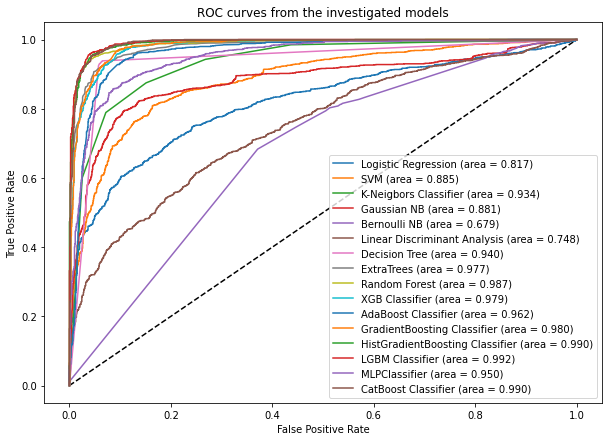

In [ ]:
#generating confusion matrices and results of performance metrices of the models used after balancing dataset

test_balanced = run_model(X_train, y_train, X_test, y_test, models_balanced, 10)    

In [ ]:
#tabular representation

test_balanced

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score,Cohen-Kappa Score
13,LGBM Classifier,95.644149,95.125966,0.519013,0.956152,0.951374,0.964975,0.958126,0.912746
12,HistGradientBoosting Classifier,95.385751,94.682914,0.579773,0.953528,0.947961,0.963545,0.955689,0.907564
15,CatBoost Classifier,95.238095,94.775165,0.606237,0.952196,0.950355,0.957827,0.954076,0.904634
8,Random Forest,94.795127,94.073683,0.493051,0.947689,0.944209,0.955683,0.949911,0.895747
6,Decision Tree,93.503138,92.808874,0.626672,0.935180,0.942795,0.930665,0.936691,0.869979
7,ExtraTrees,92.875600,92.624356,0.652320,0.929225,0.945347,0.914939,0.929895,0.857514
11,GradientBoosting Classifier,92.838686,92.421250,0.558271,0.928747,0.942040,0.917798,0.929761,0.856744
9,XGB Classifier,92.284976,92.024265,0.536888,0.923288,0.938791,0.909936,0.924138,0.845694
10,AdaBoost Classifier,89.664083,89.245885,0.773864,0.898059,0.939513,0.854896,0.895210,0.793689
14,MLPClassifier,88.482835,86.549994,1.805622,0.885165,0.899339,0.874911,0.886957,0.769620


In [ ]:
CB_classifier = [(CatBoostClassifier(),
                 [{'depth' : list(range(4,11)), 'learning_rate' : [0.01,0.02,0.03,0.04], 'iterations' : list(range(10,110,10))}])]

In [ ]:
for i,j in CB_classifier:
  tun = RandomizedSearchCV(i,j,scoring='accuracy',cv=10,verbose=2,n_jobs=4)
  tun.fit(X_train,y_train)
  best_accuracy = tun.best_score_
  best_params = tun.best_params_
  print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
  print(' Best parameteres are: ', best_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
0:	learn: 0.6660226	total: 17.1ms	remaining: 1.52s
1:	learn: 0.6411361	total: 30.1ms	remaining: 1.33s
2:	learn: 0.6191858	total: 43.2ms	remaining: 1.25s
3:	learn: 0.5960226	total: 57ms	remaining: 1.22s
4:	learn: 0.5749720	total: 70.6ms	remaining: 1.2s
5:	learn: 0.5541098	total: 83.7ms	remaining: 1.17s
6:	learn: 0.5373906	total: 97.1ms	remaining: 1.15s
7:	learn: 0.5213718	total: 110ms	remaining: 1.13s
8:	learn: 0.5000741	total: 124ms	remaining: 1.12s
9:	learn: 0.4838656	total: 138ms	remaining: 1.1s
10:	learn: 0.4643769	total: 151ms	remaining: 1.08s
11:	learn: 0.4509537	total: 165ms	remaining: 1.07s
12:	learn: 0.4363150	total: 178ms	remaining: 1.05s
13:	learn: 0.4251976	total: 191ms	remaining: 1.04s
14:	learn: 0.4144773	total: 205ms	remaining: 1.02s
15:	learn: 0.4013673	total: 223ms	remaining: 1.03s
16:	learn: 0.3900836	total: 237ms	remaining: 1.02s
17:	learn: 0.3807375	total: 252ms	remaining: 1.01s
18:	learn: 0.3697072	total

In [ ]:
HGB_classifier = [(HistGradientBoostingClassifier(),
                  [{'learning_rate' : [0.01,0.04,0.07,0.1],'max_iter' : list(range(75,150)),'max_leaf_nodes' : [10,20,30]}])]

In [ ]:
for i,j in HGB_classifier:
  tun = RandomizedSearchCV(i,j,scoring='accuracy',cv=10,verbose=2,n_jobs=4)
  tun.fit(X_train,y_train)
  best_accuracy = tun.best_score_
  best_params = tun.best_params_
  print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
  print(' Best parameteres are: ', best_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
 HistGradientBoostingClassifier(): 
 Best Accuracy: 95.00 %
 Best parameteres are:  {'max_leaf_nodes': 30, 'max_iter': 80, 'learning_rate': 0.07}


In [ ]:
LGBM_classifier = [(LGBMClassifier(),
                   [{'learning_rate' : [0.01,0.04,0.07,0.1],'n_estimators' : list(range(10,100)),'min_data_in_leaf' : list(range(10,25))}])]

In [ ]:
for i,j in LGBM_classifier:
  tun = RandomizedSearchCV(i,j,scoring='accuracy',cv=10,verbose=2,n_jobs=4)
  tun.fit(X_train,y_train)
  best_accuracy = tun.best_score_
  best_params = tun.best_params_
  print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
  print(' Best parameteres are: ', best_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
 LGBMClassifier(): 
 Best Accuracy: 95.42 %
 Best parameteres are:  {'n_estimators': 87, 'min_data_in_leaf': 12, 'learning_rate': 0.1}


In [ ]:
RF_classifier = [(RandomForestClassifier(),
                 [{'bootstrap' : [True,False],'max_depth': [2,4],'max_features': ['auto','sqrt'],'min_samples_leaf': [1,2],'min_samples_split': [2,5],'n_estimators' : [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]}])]

In [ ]:
for i,j in RF_classifier:
  tun = RandomizedSearchCV(i,j,scoring='accuracy',cv=10,verbose=2,n_jobs=4)
  tun.fit(X_train,y_train)
  best_accuracy = tun.best_score_
  best_params = tun.best_params_
  print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
  print(' Best parameteres are: ', best_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
 RandomForestClassifier(): 
 Best Accuracy: 89.29 %
 Best parameteres are:  {'n_estimators': 72, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 4, 'bootstrap': False}


In [ ]:
XGB_classifier = [(XGBClassifier(),
                  [{'learning_rate' : [0.01,0.04,0.07,0.1],'max_iter' : list(range(75,150)),'max_leaf_nodes' : [10,20,30]}])]

In [ ]:
for i,j in XGB_classifier:
  tun = RandomizedSearchCV(i,j,scoring='accuracy',cv=10,verbose=2,n_jobs=4)
  tun.fit(X_train,y_train)
  best_accuracy = tun.best_score_
  best_params = tun.best_params_
  print(' {}: \n Best Accuracy: {:.2f} %'.format(i,best_accuracy*100))
  print(' Best parameteres are: ', best_params)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
 XGBClassifier(): 
 Best Accuracy: 93.53 %
 Best parameteres are:  {'max_leaf_nodes': 10, 'max_iter': 123, 'learning_rate': 0.1}
